In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt


In [110]:
def gen_sti(rng, p = 0.6, n = 100000):
    return rng.binomial(n = 1, p = p, size = n)
def gen_mea(rng, sti, s = 3, sigma = 2):
    return rng.normal(loc = sti * s, scale = sigma)
def cal_log_pos(mea, sigma = 2, s = 3):
    return np.log(1.5) + s/sigma**2 * (mea - s/2)
def cal_exp_roc(d, sti, points = np.arange(-10, 10, 0.2)):
    if len(points.shape) == 1:
        points = points.reshape(-1, 1)
    H = np.mean(d[sti == 1] > points, 1)
    F = np.mean(d[sti == 0] > points, 1)
    return H, F

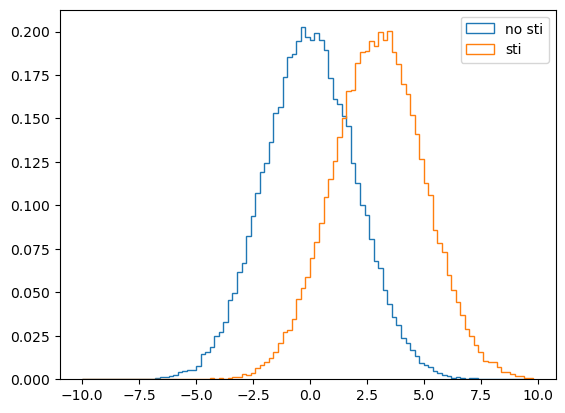

In [111]:
rng = np.random.default_rng(42)
sti = gen_sti(rng, 0.6, 100000)
mea = gen_mea(rng, sti, s = 3, sigma = 2)
plt.hist(mea[sti == 0], bins = np.arange(-10, 10, 0.2), 
         density= True, histtype = 'step', label = 'no sti')
plt.hist(mea[sti == 1], bins = np.arange(-10, 10, 0.2), 
         density = True, histtype = 'step', label = 'sti')
plt.legend()
plt.show()

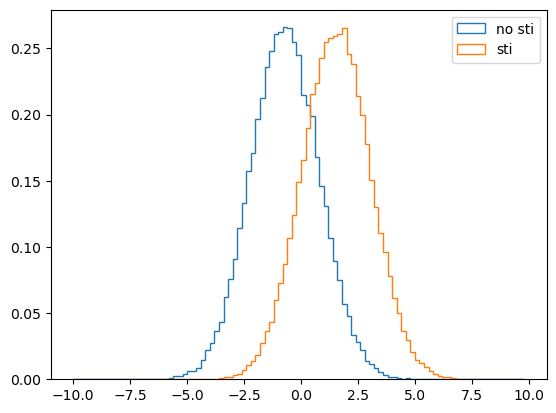

In [112]:
d = cal_log_pos(mea)
plt.hist(d[sti == 0], bins = np.arange(-10, 10, 0.2), 
         density= True, histtype = 'step', label = 'no sti')
plt.hist(d[sti == 1], bins = np.arange(-10, 10, 0.2), 
         density = True, histtype = 'step', label = 'sti')
plt.legend()
plt.show()


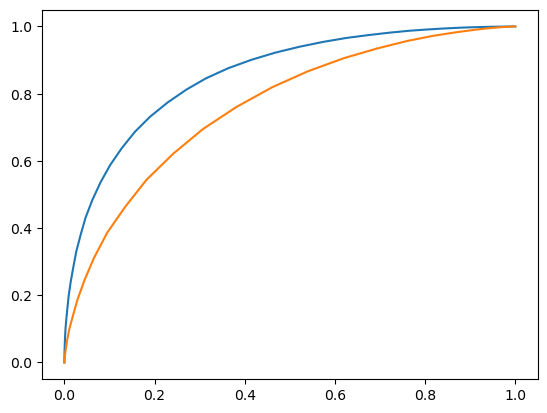

In [113]:
H, F = cal_exp_roc(d, sti)
plt.plot(F, H)
mea2 = gen_mea(rng, sti, s = 2, sigma = 2)
d2 = cal_log_pos(mea2, sigma = 2, s = 2)
H2, F2 = cal_exp_roc(d2, sti)
plt.plot(F2, H2)

In [115]:
-(np.diff(F) * H[1:]).sum()

0.8441863998136696

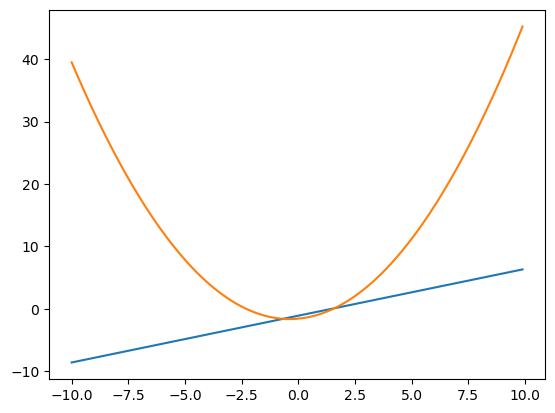

In [114]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, 0.75 * x - 1.125)
plt.plot(x, 0.5 * (x**2 - (x-3)**2/9) - np.log(3))

In [100]:
def gen_sti(rng, p = 0.5, n = 100000):
    return rng.binomial(n = 1, p = p, size = n)
def gen_mea(rng, sti, s, sigma):
    loc = sti * s[0] + (1 - sti) * s[1]
    scale = sti * sigma[0] + (1 - sti) * sigma[1]
    return rng.normal(loc, scale)

def cal_log_pos(mea, s, sigma):
    return np.log(sigma[1]/sigma[0]) - 0.5 * ((mea - s[0])**2/sigma[0]**2 - (mea - s[1])**2/sigma[1]**2)
def cal_exp_roc(d, sti, points = np.arange(-10, 10, 0.2)):
    if len(points.shape) == 1:
        points = points.reshape(-1, 1)
    H = np.mean(d[sti == 1] > points, 1)
    F = np.mean(d[sti == 0] > points, 1)
    return H, F

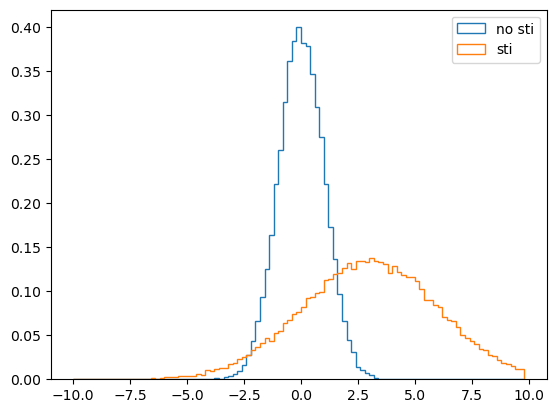

In [99]:
sti = gen_sti(rng, 0.5, 100000)
mea = gen_mea(rng, sti, [3, 0], [3, 1])
plt.hist(mea[sti == 0], bins = np.arange(-10, 10, 0.2), 
         density= True, histtype = 'step', label = 'no sti')
plt.hist(mea[sti == 1], bins = np.arange(-10, 10, 0.2), 
         density = True, histtype = 'step', label = 'sti')
plt.legend()
plt.show()

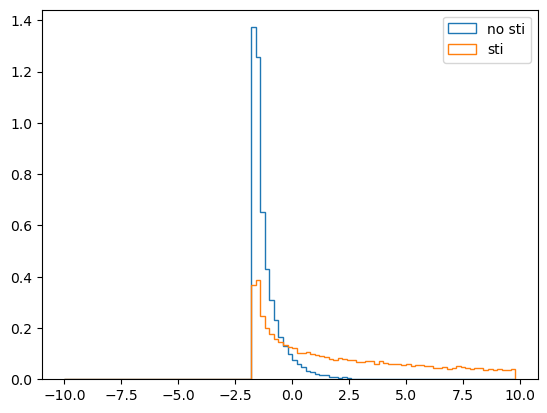

In [102]:
d = cal_log_pos(mea, [3, 0], [3, 1])
plt.hist(d[sti == 0], bins = np.arange(-10, 10, 0.2), 
         density= True, histtype = 'step', label = 'no sti')
plt.hist(d[sti == 1], bins = np.arange(-10, 10, 0.2), 
         density = True, histtype = 'step', label = 'sti')
plt.legend()
plt.show()

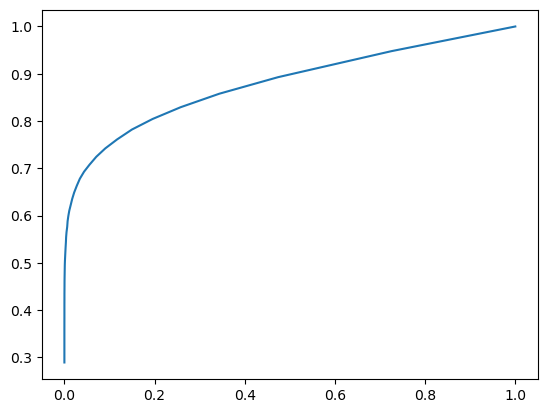

In [105]:
H, F = cal_exp_roc(d, sti)
plt.plot(F, H)

In [109]:
-(np.diff(F) * H[1:]).sum()

0.8589259730512551

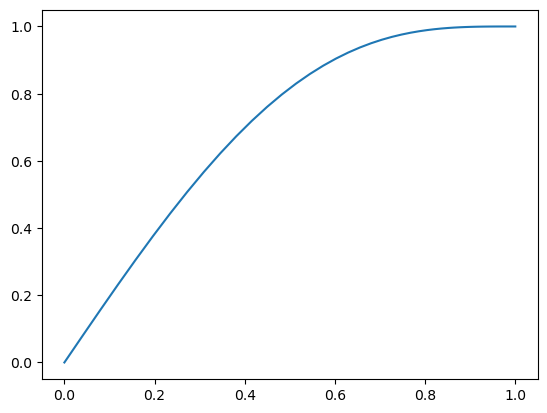

In [118]:
from scipy.stats import norm
sigma, s1, s2 = 0.2, 1, 2
lamb = np.arange(0, 10, 0.1)
H = 2 * norm.cdf(lamb/np.sqrt(sigma**2 + s1**2)) - 1
F = 2 * norm.cdf(lamb/np.sqrt(sigma**2 + s2**2)) - 1
plt.plot(F, H)

In [ ]:
norm.